In [65]:
import numpy as np
import pandas as pd

df = pd.read_csv("filtered_text_time.csv")

In [44]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,manual_hour,first_matching_sentence,contains_number,closest_number_minutes,closest_number_hours,total_time
0,10,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4.0,0,0,0,"Comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09,0.0,"However, if you stay on the top floors you may...",True,15,0,0.250000
1,12,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0,3,1,1,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04,0.0,Took the boy for his birthday and put our name...,True,45,0,0.750000
2,19,QS7CuOtFLuS3dnwKHRtSYQ,PBnEwGVCBL0N-bET6ZI6kQ,m5-FtgWRd4qA7j0vaOXiXQ,5.0,0,0,0,Had to wait until my third trip to NOLA to act...,2016-11-10 20:56:13,1.0,Well worth the extra $20 to not hassle with wa...,True,0,0,1.000000
3,29,940tqxFO4Pwg_KMg4Y4Z5g,O6wkgoJqU7KMjleSlCDGaA,EQ-TZ2eeD_E0BHuvoaeG5Q,5.0,2,0,1,Milktooth is the place to go if you want a goo...,2018-01-10 01:48:58,0.0,"Trust me, it's worth the usual 30 minute wait ...",True,30,0,0.500000
4,36,q22lpVDGRGiglEUqjdbA4A,8BWSevPgwWzMwqu_K-AdfA,P10BsKUeoeCeVoK4BS2u0w,2.0,5,0,0,I've been wanting to try Trust Me BBQ for over...,2012-05-28 17:55:04,0.0,I stopped in there about 3 months ago and wait...,True,10,0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183966,1255590,ZgMFhqwQze4gLJJqUevgqg,eE5cGP32rTKr8IiBLSYevw,aK6R2akvIK9ijw3FvDy8vw,1.0,0,0,0,"this place sucks. horrible customer service, I...",2018-04-07 02:15:25,0.0,"horrible customer service, I had to wait 20 mi...",True,20,0,0.333333
183967,1255592,GyNfq7-l6-EazOLcehVvmQ,30mLJI_M7Jcel0eFKKm_kA,DnuRO4i1yI5REm5v1pUxWQ,1.0,1,0,0,First of all I made a phone order and still ha...,2021-08-17 22:12:58,0.0,First of all I made a phone order and still ha...,True,20,0,0.333333
183968,1255597,Q6h57S-h4-ND2slRKUg1wg,VjiqLNphmE322B7rDuNoSQ,e3BJXpNS5pjcdXycdxagJw,1.0,0,0,0,I only went here for Dr Shah for about 8 years...,2020-03-10 16:58:16,1.0,So I go for a cleaning today and an hour and 1...,True,15,0,1.250000
183969,1255602,r1s8DYA_zlYUXNxDHDOj9Q,ZtQr5DOhdD0yCJxal6oqlQ,cn3GfkDkzhwWBKDNgsiQLA,1.0,2,1,0,Service should be in the negatives - Arrived 1...,2013-04-06 03:24:15,0.0,I called them after waiting 45 minutes and the...,True,45,0,0.750000


In [45]:
import re
def contains_keywords(text):
    # Define the regular expression pattern to match 'walk' and 'out' together in any order,
    # or 'leave', or 'left'
    pattern = re.compile(
        r'(\bwalk\b.*?\bout\b|\bleave\b|\bleft\b)',
        re.IGNORECASE
    )

    # Search the text for the pattern
    return bool(pattern.search(text))

In [96]:
df['leave'] = df['text'].apply(
    lambda x: contains_keywords(x) 
).tolist()

In [97]:
df_leave = df[df['leave'] == True]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df = df[df['total_time'] < 2]

In [12]:
np.median(df['stars'])

2.0

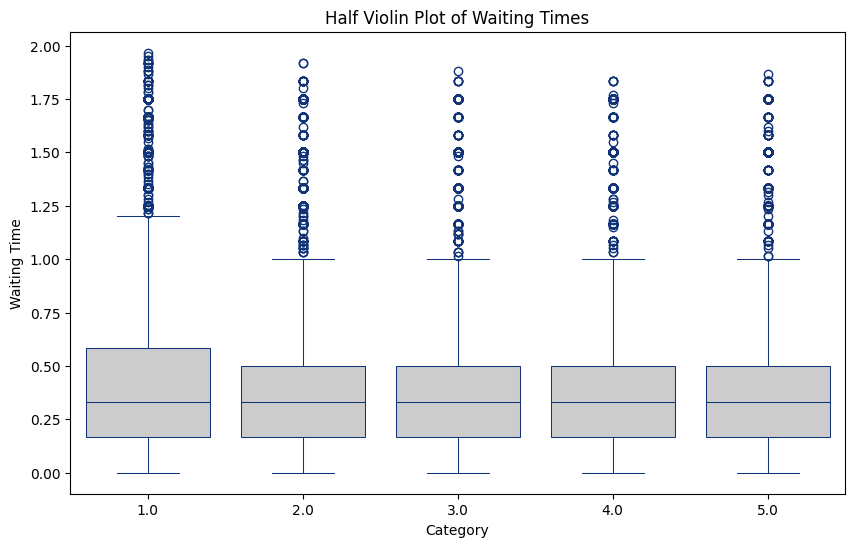

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the half violin plot
plt.figure(figsize=(10, 6))

sns.boxplot(x='stars', y='total_time', data=df[df['total_time'] < 2], color=".8", linecolor="#137", linewidth=.75)

# This line makes the violin plot only appear on one side
#plt.gca().collections[0].set_visible(False)

plt.title('Half Violin Plot of Waiting Times')
plt.xlabel('Category')
plt.ylabel('Waiting Time')
plt.show()


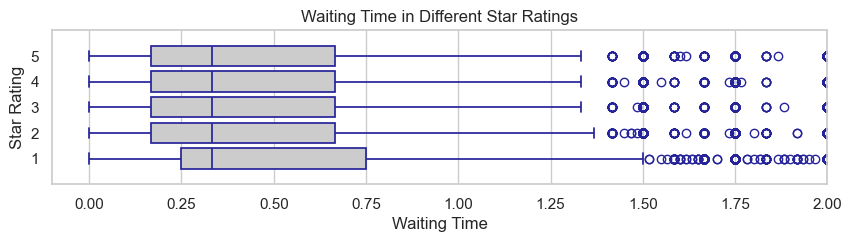

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(10, 2))
sns.set(style="whitegrid")
# Creating the box plot with specific color and line properties
ax = sns.boxplot(x='total_time', y='stars', data=df[df['total_time'] < 5],  color=".8", linecolor="#26249A", linewidth=1.25, orient='h')

# Setting the title and labels
plt.title('Waiting Time in Different Star Ratings')
plt.ylabel('Star Rating')
plt.xlabel('Waiting Time')
plt.ylim(5, -1)
plt.xlim(-0.1,2)

ax.invert_yaxis()
# Displaying the plot
plt.show()


In [67]:
df = df.astype({"stars": int})

In [172]:
df_filter = df[df['total_time'] < 10]
df_filter = df_filter[df_filter['star'] < 5]

In [173]:
df_filter['time_min'] = df_filter['total_time'] * 60

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


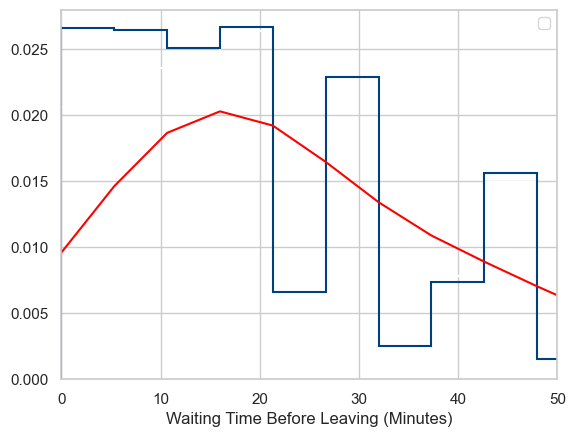

In [202]:
import scipy.stats as stats
import matplotlib.mlab as mlab

leave = df_filter[df_filter['stars'] == 1]['time_min']
stay = df_filter[df_filter['stars'] > 1]['time_min']


# Histogram settings with normalization
bins = np.histogram_bin_edges(leave , bins=107)
density = stats.gaussian_kde(leave)
n, x, _ =plt.hist(leave, bins=bins,  linewidth = 1.5 ,  density=True,  color="#FFFFFF", histtype=u'step')
plt.hist(stay, bins=bins,  linewidth = 1.5 ,  density=True,  color="#00407D", histtype=u'step')
plt.plot(x, density(x), color='red')

# Adding labels and title
plt.xlabel('Waiting Time Before Leaving (Minutes)')
plt.xlim(0, 50)
plt.legend()

# Display the plot
plt.show()


In [179]:
percentiles = df_filter["time_min"].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.9])

In [180]:
percentiles

0.05     0.0
0.10     5.0
0.25    10.0
0.50    20.0
0.75    45.0
0.90    90.0
Name: time_min, dtype: float64

In [ ]:
0.10     5.0
0.25    10.0

In [190]:
df_leave = df_filter[df_filter['leave'] == True]

In [191]:
df_leave[['text', 'first_matching_sentence', 'time_min']].head(30).to_csv("help.csv")

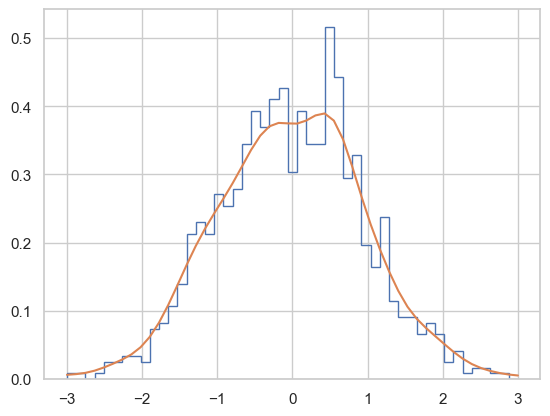

In [120]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

noise = np.random.normal(0, 1, (1000, ))
density = stats.gaussian_kde(noise)
n, x, _ = plt.hist(noise, bins=np.linspace(-3, 3, 50), 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.show()